In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
#data=data.drop(['month','day'],axis=1)
#data

In [15]:
x=data.iloc[:,0:30]
y=data.iloc[:,30]

In [ ]:
#from sklearn.preprocessing import StandardScaler
#s=StandardScaler()
#x_std=s.fit_transform(x)

In [ ]:
#x_std

In [ ]:
#pd.DataFrame(x_std).describe()

In [9]:
columns=['month','day']

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    data[i]=le.fit_transform(data[i])

data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Tuning of Parameters: Batch Size & Epochs

In [19]:
# Importing necessary packages
from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [26]:
# create model
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=30,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(30,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model


In [28]:
model=KerasClassifier(build_fn=create_model,verbose=0)
# Define Grid Search parameters
batch_size=[10,20]
epochs=[10,50]
# Creating dictionary of Grid Search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
# Built and Fit the Grid Search CV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.885, total=   1.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.971, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.796, total=   1.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.825, total=   1.5s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   2.7s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   2.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.961, total=   3.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.932, total=   2.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   3.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   1.5s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   1.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.971, total=   1.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.971, total=   1.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.883, total=   1.1s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=1.000, total=   1.7s
[CV] batch_size=20, epochs=50 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   35.5s finished


In [29]:
# Summarize the result
print('Best: {}u using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best: 0.9766990303993225u using {'batch_size': 10, 'epochs': 50}


## Tuning of Hyperparameters: Learning Rate & Dropout Rate

In [30]:
from keras.layers import Dropout

# Define the model
def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(12,input_dim=30,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim=12,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model


In [33]:
# Create the model
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=10)

#Define grid search parameters
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

param_grid=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

In [34]:
#fit the GridSearch CV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=1.000, total=   1.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.750, total=   1.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.757, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.777, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.835, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.942, total=   1.8s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.981, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.932, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.971, total=   1.4s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=1.000, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.750, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.524, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.680, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.699, total=   2.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=1.000, total=   1.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.0min finished


In [35]:
print('Best: {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best: 0.967102324962616, using {'dropout_rate': 0.1, 'learning_rate': 0.01}


## Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [47]:
def create_model(activation_fn, kernel_initializer):
    model=Sequential()
    model.add(Dense(12,input_dim=30,kernel_initializer=kernel_initializer,activation=activation_fn))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim=12, kernel_initializer=kernel_initializer,activation=activation_fn))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer=kernel_initializer,activation=activation_fn))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=adam)
    return model

In [48]:
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=20,epochs=10)
activation_fn=['softmax','relu','tanh','linear']
kernel_initializer=['uniform','normal','zero']

param_grid=dict(activation_fn=activation_fn,kernel_initializer=kernel_initializer)

In [49]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,verbose=10,cv=KFold())
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=1.000, total=   2.4s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.750, total=   1.4s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.524, total=   1.3s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.680, total=   1.3s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.699, total=   1.2s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=1.000, total=   1.8s
[CV] activation_fn=softmax, kernel_initializer=normal ................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.3s remaining:    0.0s


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.750, total=   2.3s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.7s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.524, total=   1.7s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.4s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.680, total=   1.4s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.8s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.699, total=   1.5s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=1.000, total=   2.0s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.750, total=   2.4s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.524, total=   2.6s
[CV] activation_fn=softmax, 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.5min finished


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [50]:
print('Best: {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best: 0.7402352571487427, using {'activation_fn': 'linear', 'kernel_initializer': 'normal'}


## Hypertuning of Parameters: Number of Neurons

In [56]:
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=30,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=adam)
    return model


In [57]:
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=10,epochs=50)

neuron1=[4,8,16]
neuron2=[2,4,8]

param_grid=dict(neuron1=neuron1,neuron2=neuron2)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   2.7s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.750, total=   2.7s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.524, total=   2.9s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.864, total=   2.9s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.1s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.951, total=   2.9s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.0s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=1.000, total=   3.1s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.1s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.962, total=   2.4s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.5s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.883, total=   2.5s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.0s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.913, total=   2.8s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   24.9s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.932, total=   2.8s
[CV] neuron1=4, neuron2=8 ............................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.0min finished


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [58]:
print('Best: {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best: 0.9651978969573974, using {'neuron1': 8, 'neuron2': 8}


## Training the Model with optimum values of Hyperparameters

In [60]:
# Define Model
def create_model():
    model=Sequential()
    model.add(Dense(8,input_dim=30,kernel_initializer='normal',activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim=8,kernel_initializer='normal',activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [61]:
# Create Model
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=10,epochs=50)

# Fitting model
model.fit(x,y)

#Predicting the results
y_pred=model.predict(x)
y_pred

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


C:\Users\Aswathy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['s

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y,y_pred))

0.9922630560928434


In [64]:
history=model.fit(x,y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 17/150
Epoch 18/150
Epoch 19/150
Epoch 20/150
Epoch 21/150
Epoch 22/150
Epoch 23/150
Epoch 24/150
Epoch 25/150
Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/150
Epoch 68/150
Epoch 69/150
Epoch 70/150
Epoch 71/150
Epoch 72/150
Epoch 73/150
Epoch 74/150
Epoch 75/150
Epoch 76/150
Epoch 77/150
Epoch 78

In [67]:
model.history.history.keys()

AttributeError: 'KerasClassifier' object has no attribute 'history'

Text(0, 0.5, 'accuracy')

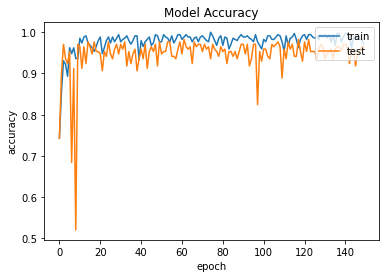

In [68]:
import matplotlib.pyplot as plt
# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('epoch');plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

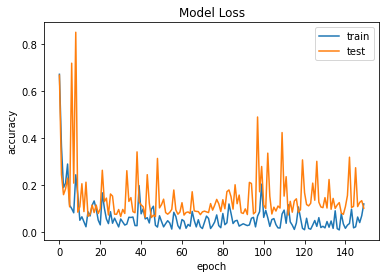

In [69]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('epoch');plt.ylabel('accuracy')